# **Dividir para conquistar**
... **ou segmentar para vender mais:** 

*Como a segmentação da base de clientes proporciona um melhor entendimento das oportunidades para gerar negócios.*



# Objetivo
Este projeto analisa informações sobre a base de clientes da Maven Marketing e tem o propósito de fornecer recomendações e insights para aprofundar o entendimento sobre oo perfil destes clientes e melhorar o desempenhode suas campanhas de Marketing.

Além de expor as habilidades do autor no que se refere a:
- Avaliação diagnóstica e limpeza da base de dados
- Manuseio e análise exploratória das informações
- Entendimento de contexto mercadológico, técnicas e ferramentas de Marketing
- Apresentação dos dados e criação de painéis de KPI’s
- Storytelling e diagramação visual da apresentação


**Que perguntas a análise visa responder?**

   -  Qual o perfil médio de um cliente da Maven?
   -  Quais produtos performam melhor?
   -  Quais canais são os favoritos dos clientes?
   -  Onde estão localizados os clientes que gastam mais?
   -  Há fatores que influenciam as compras online de forma significativa?
   -  Qual o grupo de clientes mais importantes? quem são eles?
   -  Que grupo de clientes merece atenção especial? Por que? 
   -  Quais campanhas de Marketing tiveram melhor desempenho?
   -  Como posso vender mais para esta base de clientes?

# Metodologia / ferramentas

**Base de dados**

As análises foram criadas a partir da base de dados pública, disponibilizada em 02/05/2021 pela Maven Analytics, com dados de 02 anos de suas campanhas de marketing, incluindo perfis de **2.240 clientes**: suas preferências de produtos, desempenho de campanhas e canais de venda. 

A base está disponível em: [Maven Analytics Data Playground](https://www.mavenanalytics.io/data-playground?search=marketing)

.

**Ferramentas**

Toda a limpeza, manuseio e exploração da base foi feita usando:
   -   Plataforma [Google Colab ](https://colab.research.google.com/) 
   -   Linguagem Phyton
   -   Bibliotecas: Pandas, Numpy, Matplotlib, Seaborn, Geopy e outras
   -   Microsoft Excel

.

Para os gráficos, dashboards e apresentações usei:
   -   [Tableau Public](https://public.tableau.com/app/about ) 
   -   Google Presentations




#**Código**#  
*Let's code!*

In [1]:
#carregando as bibliotecas e instalando módulos
import pandas as pd
from pandas.tseries.offsets import YearEnd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import geopy
from geopy.geocoders import Nominatim

from datetime import datetime
from google.colab import files
## as de cima eu já usei
from pathlib import Path
import re
import sqlite3


In [2]:
#carregando os dados
base0 = pd.read_excel ("https://marciomm7.files.wordpress.com/2023/02/sales_rfm.xlsx")


# **Avaliação Diagnóstica da base de dados**



In [3]:
#exploração inicial da base de dados
base0.shape

(2240, 28)

In [4]:

base0.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,Spain
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,Canada
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,USA
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,Australia
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,Spain


In [5]:
base0.tail()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,11,4,0,0,0,0,0,0,0,USA
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,3,8,0,0,0,0,0,0,0,Spain
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,5,8,0,0,0,0,0,0,0,Spain
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,10,3,0,0,0,0,0,0,0,India
2239,4070,1969,PhD,Married,94871.0,0,2,2012-09-01,99,169,...,4,7,0,1,1,0,0,1,0,Canada


**Procurando por valores duplicados ou redundantes**


In [6]:
base0.duplicated().sum()

0

In [7]:
#Procurando por valores duplicados ou redundantes nas colunas tipo string / texto

#Education
display(base0['Education'].unique())

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [8]:
#Country
display(base0['Country'].unique()) 


array(['Spain', 'Canada', 'USA', 'Australia', 'Germany', 'India',
       'Saudi Arabia', 'Mexico'], dtype=object)

In [9]:
#Marital_Status
display(base0['Marital_Status'].unique())


array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

Problemas encontrados:
  
   - 1) Atributo **Marital_Status** 
  -  itens redundantes: "Alone" e "Single" parecem ser a mesma coisa (confirmar com cliente)
  -  itens redundantes: "YOLO" e "Absurd" parecem ser a mesma coisa (confirmar com cliente)

In [10]:
base0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4    Income              2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [11]:
 base0.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

Problemas encontrados:

  -   Atributo **Marital_Status**: itens redundantes (confirmar com cliente)
    -  "Alone" e "Single" parecem ser a mesma coisa (confirmar com cliente)
    -  "YOLO" e "Absurd" parecem ser a mesma coisa (confirmar com cliente)
          
  -   Atributo **Income** 
    -  tem um espaço no titulo
    -  há valores faltantes (2240 vs 2216)
    -  tipos de dados (dtypes) incorreto (deveria ser string)



Em uma primeira análise, não parecem haver valores nulos e os tipos de dados (dtypes) também parecem fazer sentido.

**METADADOS**


Para entender melhor o conteúdo de cada coluna e, assim, conseguir avaliar de maneira mais completa se elas contêm o que deveriam ou se há erros, vou precisar recorrer a uma base de dados complementar. 

A base de metadados enviada pelo cliente ***Maven Marketing***, juntamente com a base de dados principal, contém  algumas informações descritivas sobre cada um dos Atributos. 

In [12]:
# METADADOS: entendendo o que signfica cada um dos Atributos
metadados = pd.read_excel ("https://marciomm7.files.wordpress.com/2023/02/meta_data.xlsx")
display (metadados)

,Field,Description
0,ID,Customer's unique identifier
1,Year_Birth,Customer's birth year
2,Education,Customer's education level
3,Marital_Status,Customer's marital status
4,Income,Customer's yearly household income
5,Kidhome,Number of children in customer's household
6,Teenhome,Number of teenagers in customer's household
7,Dt_Customer,Date of customer's enrollment with the company
8,Recency,Number of days since customer's last purchase
9,MntWines,Amount spent on wine in the last 2 years


**PS**: *Mais adiante, na fase de manipulação dos dados, farei uma tradução dos conceitos contidos na base de Metadados. Por ora, vamos manter a base original e trabalhar com ela em inglês.*

A partir destas novas informações, proveniente dos metadados, já podemos olhar para a base original com novos olhos:
 
 **É possível afirmar que temos 05 tipos de dados distintos** e complementares sobre  os clientes da Maven, são eles:


In [13]:
#1) Informações sobre o PERFIL dos clientes 
kpis_perfil  = [0, 1, 2, 3, 4, 5, 6, 27]
display(metadados.iloc[kpis_perfil])


,Field,Description
0,ID,Customer's unique identifier
1,Year_Birth,Customer's birth year
2,Education,Customer's education level
3,Marital_Status,Customer's marital status
4,Income,Customer's yearly household income
5,Kidhome,Number of children in customer's household
6,Teenhome,Number of teenagers in customer's household
27,Country,Customer's location


In [14]:
#2) Informações sobre ENGAJAMENTO destes clientes com a empresa
kpis_engajamento  = [ 7, 8, 15, 26]
display(metadados.iloc[kpis_engajamento])

,Field,Description
7,Dt_Customer,Date of customer's enrollment with the company
8,Recency,Number of days since customer's last purchase
15,NumDealsPurchases,Number of purchases made with a discount
26,Complain,"1 if customer complained in the last 2 years, ..."


In [15]:
#3) Informações sobre o PRODUTOS PREFERIDOS dos clientes
display(metadados.iloc[9:15])

,Field,Description
9,MntWines,Amount spent on wine in the last 2 years
10,MntFruits,Amount spent on fruits in the last 2 years
11,MntMeatProducts,Amount spent on meat in the last 2 years
12,MntFishProducts,Amount spent on fish in the last 2 years
13,MntSweetProducts,Amount spent on sweets in the last 2 years
14,MntGoldProds,Amount spent on gold in the last 2 years


In [16]:
#4) Informações sobre a PREFERENCIA POR CANAIS  DE VENDA por parte destes clientes 
display(metadados.iloc[16:20])

,Field,Description
16,NumWebPurchases,Number of purchases made through the company's...
17,NumCatalogPurchases,Number of purchases made using a catalogue
18,NumStorePurchases,Number of purchases made directly in stores
19,NumWebVisitsMonth,Number of visits to company's web site in the ...


In [17]:
#5) Informações sobre o DESEMPENHO DAS CAMPANHAS de Marketing
display(metadados.iloc[20:26])

,Field,Description
20,AcceptedCmp3,1 if customer accepted the offer in the 3rd ca...
21,AcceptedCmp4,1 if customer accepted the offer in the 4th ca...
22,AcceptedCmp5,1 if customer accepted the offer in the 5th ca...
23,AcceptedCmp1,1 if customer accepted the offer in the 1st ca...
24,AcceptedCmp2,1 if customer accepted the offer in the 2nd ca...
25,Response,1 if customer accepted the offer in the last c...


já conseguimos, também, identificar novas inconsistências e pontos de melhoria na base original 


In [18]:
base0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4    Income              2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

**Problemas encontrados:**

  -   1) Atributo **Marital_Status** 
      -  itens redundantes: "Alone" e "Single" parecem ser a mesma coisa (confirmar com cliente)
      -  itens redundantes: "YOLO" e "Absurd" parecem ser a mesma coisa (confirmar com cliente)
          
  -   2) Atributo **Income** 
      -  tem um espaço no titulo
      -  há valores faltantes (2240 vs 2216) 
      -  tipos de dados (dtypes) incorreto (deveria ser inteiro)
          

  -   3) **Tipos de dados (dtypes)** incorretos nas colunas: 
   -  ID             (deveria ser string)
   -  Year_Birth     (deveria ser datetime64[ns])
   -  AcceptedCmp3   (deveria ser Category)
   -  AcceptedCmp4   (deveria ser Category)
   -  AcceptedCmp5   (deveria ser Category)
   -  AcceptedCmp1   (deveria ser Category)
   -  AcceptedCmp2   (deveria ser Category)
   -  Response       (deveria ser Category)
   -  Complain       (deveria ser Category)

**Identificando "Outliers"**

Quando os clientes fizeram o **Cadastro / 1a compra** ?? 

Há alguma data estranha, fora de um range que possamos considerar comum?

In [19]:
base0['Dt_Customer'].min()

Timestamp('2012-07-30 00:00:00')

In [20]:
base0['Dt_Customer'].max()

Timestamp('2014-06-29 00:00:00')

Datas de Cadastro entre 2012 e 2014. Parece tudo OK.

Vamos conferir as **datas de nascimento** dos clientes da base 

In [21]:

base0['Year_Birth'].min()

1893

In [22]:
base0['Year_Birth'].max()

1996

Identificar esse cliente com data de nascimento 1893. É isso mesmo? Tem outros?

In [23]:
base0[base0["Year_Birth"] < 1920]     #clientes com mais de 100 anos

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
513,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,2,4,0,0,0,0,0,0,0,Saudi Arabia
827,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,4,1,0,0,1,0,0,0,0,Spain
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,2,5,0,0,0,0,0,0,1,India


In [24]:
#Viraram clientes (cadastro / 1a compra) com mais de 100 anos.  
print( "ATENÇÃO para clientes com" , 2014 - 1893,
       2013 - 1899, 
       2013 - 1900, "anos de idade quando fizeram o 1º pedido. Detalhe: visitaram o site NO ULTIMO MÊS. Será??") 

ATENÇÃO para clientes com 121 114 113 anos de idade quando fizeram o 1º pedido. Detalhe: visitaram o site NO ULTIMO MÊS. Será??


In [25]:
# Procurando por outliers em Income
base0[' Income '].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name:  Income , dtype: float64

Podemos ver que a renda mediana está próxima a 52 mil. A maior parte dos clientes apresenta renda entre 35 e 70 mil, com **alguns valores extremos acima de R$ 100 mil.** 

Investigar melhor isso e limpar, se for o caso.

**Problemas encontrados:**

 - 1) o Atributo **Marital_Status** 
      -  itens redundantes: (confirmar com cliente)
         - "Alone" e "Single" parecem ser a mesma coisa 
         - "YOLO" e "Absurd" parecem ser a mesma coisa 
          
 - 2) o Atributo **Income** 
      -  tem um espaço no titulo
      -  há valores faltantes (2240 vs 2216) 
      -  tipos de dados (dtypes) incorreto (deveria ser inteiro)
          

 - 3) **tipos de dados (dtypes)** incorretos nas colunas: 
      -  ID             (deveria ser string)
      -  Year_Birth     (deveria ser datetime64[ns])
      -  AcceptedCmp3   (deveria ser Category)
      -  AcceptedCmp4   (deveria ser Category)
      -  AcceptedCmp5   (deveria ser Category)
      -  AcceptedCmp1   (deveria ser Category)
      -  AcceptedCmp2   (deveria ser Category)
      -  Response       (deveria ser Category)
      -  Complain       (deveria ser Category)


 - 4) Investigar / Excluir  **Outliers em Income** 


 - 5) Investigar / Excluir  **clientes com 100+ anos** no 1º pedido



           

# **Limpeza da base de dados**

Identificados os problemas na base original, vamos agora duplica-la para corrigir os problemas em uma nova base de dados.

In [26]:
# Criando uma cópia da Base de Dados Original
base_1_clean = base0.copy()

In [27]:
base_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4    Income              2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

**Corrigindo cada um dos Problemas encontrados:**

 - 1) Atributo **Marital_Status** : 
          
   - itens redundantes: (CONFIRMADOS com cliente)
   - "Alone" e "Single" parecem ser a mesma coisa 
   - "YOLO" e "Absurd" parecem ser a mesma coisa

In [28]:
base_1_clean['Marital_Status']=base_1_clean['Marital_Status'].str.replace('Alone', 'Single')
base_1_clean['Marital_Status']=base_1_clean['Marital_Status'].str.replace('Absurd', 'YOLO')

In [29]:
# conferindo:

#original
display(base0['Marital_Status'].unique())
#clean
display(base_1_clean['Marital_Status'].unique())

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO'],
      dtype=object)

2) Atributo ** Income** : espaço no titulo, 24 valores faltantes e dtype incorreto

In [30]:
        # entendendo / alterando os valores faltantes
base_1_clean[' Income '].isna().sum()

24

A base é composta por dados de 2.240 clientes

Os 24 clientes sem a informação de Income / Renda representam **pouco mais de 1% o total.**

In [31]:
print (base_1_clean[' Income '].isna().sum() / 2240 *100, "% do total")

1.0714285714285714 % do total


... ainda assim, vamos encontra-los e corrigi-los

In [32]:
display (base_1_clean[base_1_clean.isna().any(axis=1)])

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
134,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,8,9,0,0,0,0,0,0,0,Germany
262,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,2,7,0,0,0,0,0,0,0,USA
394,3769,1972,PhD,Together,NaN,1,0,2014-03-02,17,25,...,3,7,0,0,0,0,0,0,0,Australia
449,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,0,1,0,0,0,0,0,0,0,Australia
525,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,7,6,0,0,0,0,0,0,0,Canada
590,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,3,8,0,0,0,0,0,0,0,Germany
899,10475,1970,Master,Together,NaN,0,1,2013-04-01,39,187,...,6,5,0,0,0,0,0,0,0,USA
997,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,2,7,0,0,0,0,0,0,0,Germany
1096,4345,1964,2n Cycle,Single,NaN,1,1,2014-01-12,49,5,...,2,7,0,0,0,0,0,0,0,Australia
1185,7187,1969,Master,Together,NaN,1,1,2013-05-18,52,375,...,4,3,0,0,0,0,0,0,0,Australia


Vou preencher os valore vazios com o **valor médio da renda** dos clientes da base

In [33]:
base_1_clean[' Income '].mean()

52247.25135379061

In [34]:
base_1_clean[' Income '] = base_1_clean[' Income '].fillna((base_1_clean[' Income '].mean()))

# conferindo:

#original
display(base0[' Income '].isna().sum())

#clean
display(base_1_clean[' Income '].isna().sum())


24

0

In [35]:
base_1_clean.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
 Income                0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

In [36]:
# alterando o nome de "Income"
base_1_clean = base_1_clean.rename (columns= {' Income ': 'Income'})

 - 3) Corrigir tipos de dados **(dtypes) incorretos**: 
      -   ID             (deveria ser string)
      -   Year_Birth     (deveria ser datetime64[ns])
      -  Income         (deveria ser nº inteiro)
      -  AcceptedCmp3   (deveria ser Category)
      -  AcceptedCmp4   (deveria ser Category)
      -  AcceptedCmp5   (deveria ser Category)
      -  AcceptedCmp1   (deveria ser Category)
      -  AcceptedCmp2   (deveria ser Category)
      -  Response       (deveria ser Category)
      -  Complain       (deveria ser Category)

In [37]:
print (base_1_clean.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')


In [38]:
# Corrigindo tipos de dados => [category] 
cols = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain']
for col in cols:
    base_1_clean[col] = base_1_clean[col].astype('category')

# Corrigindo tipos de dados => [datetime]
base_1_clean['Year_Birth'] = pd.to_datetime(base_1_clean['Year_Birth'], format = "%Y")

# Corrigindo tipos de dados => [float to int]
base_1_clean['Income'] = base_1_clean['Income'].astype(int)

# # Corrigindo tipos de dados => [string]
base_1_clean['ID'] = base_1_clean['ID'].astype('str')

In [39]:
# conferindo:

#original
base0[['ID', ' Income ', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain','Year_Birth']].dtypes

ID                int64
 Income         float64
AcceptedCmp3      int64
AcceptedCmp4      int64
AcceptedCmp5      int64
AcceptedCmp1      int64
AcceptedCmp2      int64
Response          int64
Complain          int64
Year_Birth        int64
dtype: object

In [40]:
#clean
base_1_clean[['ID','Income', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain','Year_Birth']].dtypes


ID                      object
Income                   int64
AcceptedCmp3          category
AcceptedCmp4          category
AcceptedCmp5          category
AcceptedCmp1          category
AcceptedCmp2          category
Response              category
Complain              category
Year_Birth      datetime64[ns]
dtype: object

Próximo:

4) Investigar / Excluir  **Outliers em Income** 

In [41]:
base_1_clean['Income'].describe()

count      2240.000000
mean      52247.248661
std       25037.797168
min        1730.000000
25%       35538.750000
50%       51741.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

Vimos que a **renda mediana está próxima a 52 mil **e que a maior parte dos clientes apresenta renda entre 35 e 70 mil, com alguns **valores extremos acima de R$ 100 mil**.

Vamos tentar enxergar isto num **gráfico Boxplot **para deixar mais visual.

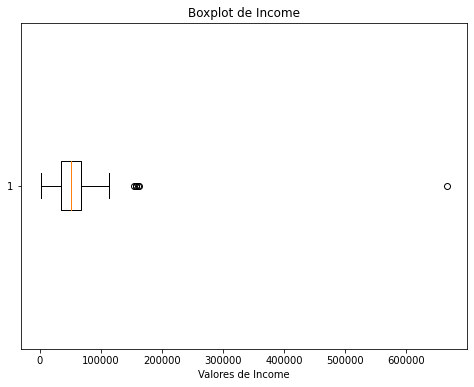

In [42]:
plt.figure(figsize=(8,6))
plt.boxplot(base_1_clean['Income'], vert=False)
plt.title('Boxplot de Income')
plt.xlabel('Valores de Income')
plt.show()

O boxplot da renda é um gráfico que representa a distribuição dos dados de renda dos clientes. 

A caixa representa os valores que se encontram entre o primeiro e o terceiro quartil, ou seja, onde se concentram 50% dos dados (no caso, 50% dos clientes tem renda entre 35 e 70 mil). 

A linha que divide a caixa ao meio representa a mediana, ou seja, o valor que está no centro da distribuição dos dados (52 mil) . As hastes representam os valores mínimo e máximo da distribuição, com os pontos fora das hastes sendo considerados valores extremos. Vemos um ponto muito acima do todo. com valor acima de 600 mil 

A partir do gráfico, fica ainda mais claro que a distribuição é assimétrica à direita, ou seja, tem uma cauda longa para valores mais altos de renda, o que pode impactar lá na frente, quando formos analisar a segmentação de clientes.

Vamos explorar mais a fundo, quantos são e como lidar com estes indivíduos da base

In [43]:
Renda_Outlier = base_1_clean[base_1_clean['Income'] > 100000]
display (Renda_Outlier[['ID', 'Income']].sort_values(by='Income', ascending=False))

,ID,Income
527,9432,666666
731,1503,162397
497,1501,160803
853,5336,157733
2204,8475,157243
325,4931,157146
1925,11181,156924
1826,5555,153924
210,4619,113734
832,4611,105471


Vemos que a maioria dos que tem acima de 100 mil de renda está no intervalo entre 100 e 200 mil.

Há apenas um indivíduo com renda acima dos 600 mil..

Para melhor andamento dos trabalhos, **vou excluir este outlier:  ID 527**

In [44]:
base_1_clean.drop([527], inplace=True)

In [45]:
# conferindo:

#original
base0.shape

(2240, 28)

In [46]:
#clean
base_1_clean.shape

(2239, 28)

In [47]:
Renda_Outlier = base_1_clean[base_1_clean['Income'] > 600000]
display (Renda_Outlier[['ID', 'Income']])

,ID,Income


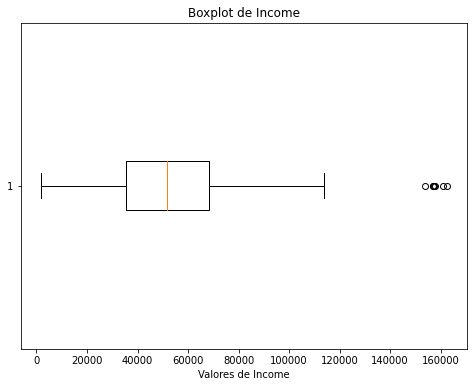

In [48]:
plt.figure(figsize=(8,6))
plt.boxplot(base_1_clean['Income'], vert=False)
plt.title('Boxplot de Income')
plt.xlabel('Valores de Income')
plt.show()

Por fim, vamos endereçar o ponto 05

5) Investigar / Excluir  **clientes com 100+ anos** no 1º pedido

In [49]:
#Descobrindo que idade os clientes tinham quando fizeram o 1º pedido na Maven
base_1_clean["Y_Birth"] = base_1_clean["Year_Birth"].dt.strftime('%Y')
base_1_clean["Y_1st_Order"] = base_1_clean["Dt_Customer"].dt.strftime('%Y')

#convertendo 'Y_Birth' para 'int'
base_1_clean['Y_Birth'] = base_1_clean['Y_Birth'].astype('int')
base_1_clean['Y_1st_Order'] = base_1_clean['Y_1st_Order'].astype('int')

#Fazendo a conta
# 'Y_1st_Order' - Y_Birth  = Idade ao realizar o 1º pedido
base_1_clean["Age_1st_Order"] = (base_1_clean["Y_1st_Order"] - base_1_clean["Y_Birth"])


In [50]:
## 4) Excluir / Confirmar esses clientes com 100+ anos

In [51]:
base_1_clean[base_1_clean["Year_Birth"] < '1/1/1920']     #clientes com mais de 100 anos

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Y_Birth,Y_1st_Order,Age_1st_Order
513,11004,1893-01-01,2n Cycle,Single,60182,0,1,2014-05-17,23,8,...,0,0,0,0,0,0,Saudi Arabia,1893,2014,121
827,1150,1899-01-01,PhD,Together,83532,0,0,2013-09-26,36,755,...,0,1,0,0,0,0,Spain,1899,2013,114
2233,7829,1900-01-01,2n Cycle,Divorced,36640,1,0,2013-09-26,99,15,...,0,0,0,0,0,1,India,1900,2013,113


In [52]:
base_1_clean.iloc[[513,	827,	2233],[0, 1, 5, 7, 16,27,28,29,30]].transpose()

,513,828,2234
ID,11004,3867,9977
Year_Birth,1893-01-01 00:00:00,1947-01-01 00:00:00,1973-01-01 00:00:00
Kidhome,0,0,0
Dt_Customer,2014-05-17 00:00:00,2013-08-31 00:00:00,2013-09-17 00:00:00
NumWebPurchases,1,9,9
Country,Saudi Arabia,Spain,USA
Y_Birth,1893,1947,1973
Y_1st_Order,2014,2013,2013
Age_1st_Order,121,66,40


São **apenas 03 clientes com dados suspeitos**... Tinham + de 110 anos quando fizeram o cadastro. 

**DETALHE**: todos eles teriam atualmente mais de 120 anos de idade e REGISTRARAM VISITAS AO SITE NO ULTIMO MES..

Como são apenas 03 clientes e não há como confirmar a real idade deles. Para fins de análises,** Vou excluir estes IDs da base de dados**  

In [53]:
base_1_clean.drop([513,	827,	2233], inplace=True)

In [54]:
# conferindo:

#original
base0.shape

(2240, 28)

In [55]:
#clean
base_1_clean.shape

(2236, 31)

In [56]:
display(base_1_clean)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Y_Birth,Y_1st_Order,Age_1st_Order
0,1826,1970-01-01,Graduation,Divorced,84835,0,0,2014-06-16,0,189,...,0,0,0,0,1,0,Spain,1970,2014,44
1,1,1961-01-01,Graduation,Single,57091,0,0,2014-06-15,0,464,...,0,0,0,1,1,0,Canada,1961,2014,53
2,10476,1958-01-01,Graduation,Married,67267,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,USA,1958,2014,56
3,1386,1967-01-01,Graduation,Together,32474,1,1,2014-05-11,0,10,...,0,0,0,0,0,0,Australia,1967,2014,47
4,5371,1989-01-01,Graduation,Single,21474,1,0,2014-04-08,0,6,...,0,0,0,0,1,0,Spain,1989,2014,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976-01-01,PhD,Divorced,66476,0,1,2013-03-07,99,372,...,0,0,0,0,0,0,USA,1976,2013,37
2236,5263,1977-01-01,2n Cycle,Married,31056,1,0,2013-01-22,99,5,...,0,0,0,0,0,0,Spain,1977,2013,36
2237,22,1976-01-01,Graduation,Divorced,46310,1,0,2012-12-03,99,185,...,0,0,0,0,0,0,Spain,1976,2012,36
2238,528,1978-01-01,Graduation,Married,65819,0,0,2012-11-29,99,267,...,0,0,0,0,0,0,India,1978,2012,34


# **Manipulação e Análise Exploratória**

**Manipulação e Tradução da Base**

Antes de seguir, vou alterar o nome das colunas para que o significado de cada conceito fique mais claro, mesmo para quem não seja do Marketing. 

Usaremos a mesma nomenclatura tanto na base de METADADOS, quanto na base que acabamos de limpar. 

**Tradução / Interpretação (Metadados):**

Primeiramente, para ficar ainda mais claro, vou traduzir o conteúdo e já alterar o nome dos Atributos. Essa identificação seguirá a mesma ao longo do processo de manipulação, análise exploratória, análise de negócios e na criação dos gráficos para visualização dos insights e recomendações. 


> TRADUÇÃO LIVRE: como são poucas linhas e vou precisar explicar cada uma delas. não vou usar nenhuma biblioteca de tradução, **vou usar minhas próprias palavras e conhecimento da área** para renomear cada titulo e detalhar cada conceito na descrição do Atributo.

> NOTA: Em um cenário real, estou assumindo que tive uma conversa prévia com o cliente para validar o entendimento sobre cada um destes Atributos.

In [57]:
# criando uma nova planilha de metadados

metadados1 = metadados.copy()

Começando a Tradução / Interpretação pelos titulos das colunas (Atributos)

In [58]:
metadados1_cols = ['Atributo', 'Descricao']
metadados1.columns = metadados1_cols
metadados1.head(4)


,Campo,Descricao
0,ID,Customer's unique identifier
1,Year_Birth,Customer's birth year
2,Education,Customer's education level
3,Marital_Status,Customer's marital status


agora o conteúdo:

um primeiro teste aplicando a tradução aos primeiros Atributos

In [59]:
#Título dos Atributos ds clientes
metadados1['Atributo'] = metadados1['Atributo'].replace(
    [
     'Year_Birth',
     'Education',
     'Marital_Status',
     'Income ',
     'Kidhome'
    ],
    [
     'Ano_Nascto',
     'Educacao', 
     'Est_Civil', 
     'Renda', 
     'Nro_Criancas'])

#Descrição dos Atributos
metadados1['Descricao'] = metadados1['Descricao'].replace(
    ['Customer\'s unique identifier', 
     'Customer\'s birth year',
     'Customer\'s education level',
     'Customer\'s marital status',
     'Customer\'s yearly household income',
     'Number of children in customer\'s household'
    ],
    ['Código de Identificação do cliente',
     'Ano de NASCIMENTO do cliente', 
     'Nível de EDUCAÇÃO Formal do cliente', 
     'Estado Civil do cliente', 
     'RENDA anual do cliente',
     'Quantidade de CRIANÇAS que são dependentes do cliente'
    ])


metadados1.head(6)


,Campo,Descricao
0,ID,Código de Identificação do cliente
1,Ano_Nascto,Ano de NASCIMENTO do cliente
2,Educacao,Nível de EDUCAÇÃO Formal do cliente
3,Est_Civil,Estado Civil do cliente
4,Renda,RENDA anual do cliente
5,Nro_Criancas,Quantidade de CRIANÇAS que são dependentes do ...


**Funcionou na amostra**, agora é só aplicar nos demais Atributos. Como os textos são longos, organizei diferente para melhor visualização da documentação

In [ ]:
#Título dos Atributos ds clientes
metadados1['Atributo'] = metadados1['Atributo'].replace(['Teenhome'],['Nro_Adolesc'])
metadados1['Atributo'] = metadados1['Atributo'].replace(['Dt_Customer'],['Dt_Cadastro'])
metadados1['Atributo'] = metadados1['Atributo'].replace(['Recency'],['Recencia'])
metadados1['Atributo'] = metadados1['Atributo'].replace(['MntWines'],['Vlr_Vinho'])
metadados1['Atributo'] = metadados1['Atributo'].replace(['MntFruits'],['Vlr_Frutas'])
metadados1['Atributo'] = metadados1['Atributo'].replace(['MntMeatProducts'],['Vlr_Carne'])
metadados1['Atributo'] = metadados1['Atributo'].replace(['MntFishProducts'],['Vlr_Peixe'])
metadados1['Atributo'] = metadados1['Atributo'].replace(['MntSweetProducts'],['Vlr_Doces'])
metadados1['Atributo'] = metadados1['Atributo'].replace(['MntGoldProds'],['Vlr_Ouro'])
metadados1['Atributo'] = metadados1['Atributo'].replace(['NumDealsPurchases'],['Nro_Peds_Dsc'])
metadados1['Atributo'] = metadados1['Atributo'].replace(['NumWebPurchases'],['Nro_Peds_Site'])
metadados1['Atributo'] = metadados1['Atributo'].replace(['NumCatalogPurchases'],['Nro_Peds_Catlg'])
metadados1['Atributo'] = metadados1['Atributo'].replace(['NumStorePurchases'],['Nro_Peds_Loja'])
metadados1['Atributo'] = metadados1['Atributo'].replace(['NumWebVisitsMonth'],['Visitas_Site_Mes-1'])
metadados1['Atributo'] = metadados1['Atributo'].replace(['AcceptedCmp3'],['Conv_3a_camp'])
metadados1['Atributo'] = metadados1['Atributo'].replace(['AcceptedCmp4'],['Conv_4a_camp'])
metadados1['Atributo'] = metadados1['Atributo'].replace(['AcceptedCmp5'],['Conv_5a_camp'])
metadados1['Atributo'] = metadados1['Atributo'].replace(['AcceptedCmp1'],['Conv_1a_camp'])
metadados1['Atributo'] = metadados1['Atributo'].replace(['AcceptedCmp2'],['Conv_2a_camp'])
metadados1['Atributo'] = metadados1['Atributo'].replace(['Response'],['Conv_ult_camp'])
metadados1['Atributo'] = metadados1['Atributo'].replace(['Complain'],['Reclam_ult_2anos'])
metadados1['Atributo'] = metadados1['Atributo'].replace(['Country'],['Localizacao'])



In [ ]:
##Descrição dos Atributos

metadados1['Descricao'] = metadados1['Descricao'].replace(['Number of teenagers in customer\'s household'],['Quantidade de ADOLESCENTES que são dependentes do cliente'])
metadados1['Descricao'] = metadados1['Descricao'].replace(['Date of customer\'s enrollment with the company'], ['Data de Cadastro do Cliente'])
metadados1['Descricao'] = metadados1['Descricao'].replace(['Number of days since customer\'s last purchase'],['Número de Dias desde a última compra'])
metadados1['Descricao'] = metadados1['Descricao'].replace(['Amount spent on wine in the last 2 years'],['Valor total gasto em VINHOS nos últimos 2 anos'])
metadados1['Descricao'] = metadados1['Descricao'].replace(['Amount spent on fruits in the last 2 years'],['Valor total gasto em FRUTAS nos últimos 2 anos'])
metadados1['Descricao'] = metadados1['Descricao'].replace(['Amount spent on meat in the last 2 years'],['Valor total gasto em CARNE nos últimos 2 anos'])
metadados1['Descricao'] = metadados1['Descricao'].replace(['Amount spent on fish in the last 2 years'],['Valor total gasto em PEIXE nos últimos 2 anos'])
metadados1['Descricao'] = metadados1['Descricao'].replace(['Amount spent on sweets in the last 2 years'],['Valor total gasto em DOCE nos últimos 2 anos'])
metadados1['Descricao'] = metadados1['Descricao'].replace(['Amount spent on gold in the last 2 years'],['Valor total gasto em OURO nos últimos 2 anos'])
metadados1['Descricao'] = metadados1['Descricao'].replace(['Number of purchases made with a discount'],['Número de pedidos feitos com DESCONTO'])
metadados1['Descricao'] = metadados1['Descricao'].replace(['Number of purchases made through the company\'s web site'],['Número de pedidos feitos via SITE'])
metadados1['Descricao'] = metadados1['Descricao'].replace(['Number of purchases made using a catalogue'],['Número de pedidos feitos via CATALOGO'])
metadados1['Descricao'] = metadados1['Descricao'].replace(['Number of purchases made directly in stores'],['Número de pedidos feitos diretamente na LOJA'])
metadados1['Descricao'] = metadados1['Descricao'].replace(['Number of visits to company\'s web site in the last month'],['Número de VISITAS AO SITE no ultimo mês'])
metadados1['Descricao'] = metadados1['Descricao'].replace(['1 if customer accepted the offer in the 3rd campaign, 0 otherwise'],['Indica se o cliente converteu na 3ª CAMPANHA enviada (1 pra SIM. 0 pra NÃO)'])
metadados1['Descricao'] = metadados1['Descricao'].replace(['1 if customer accepted the offer in the 4th campaign, 0 otherwise'],['Indica se o cliente converteu na 4ª CAMPANHA enviada (1 pra SIM. 0 pra NÃO)'])
metadados1['Descricao'] = metadados1['Descricao'].replace(['1 if customer accepted the offer in the 5th campaign, 0 otherwise'],['Indica se o cliente converteu na 5ª CAMPANHA enviada (1 pra SIM. 0 pra NÃO)'])
metadados1['Descricao'] = metadados1['Descricao'].replace(['1 if customer accepted the offer in the 1st campaign, 0 otherwise'],['Indica se o cliente converteu na 1ª CAMPANHA enviada (1 pra SIM. 0 pra NÃO)'])
metadados1['Descricao'] = metadados1['Descricao'].replace(['1 if customer accepted the offer in the 2nd campaign, 0 otherwise'],['Indica se o cliente converteu na 2ª CAMPANHA enviada (1 pra SIM. 0 pra NÃO)'])
metadados1['Descricao'] = metadados1['Descricao'].replace(['1 if customer accepted the offer in the last campaign, 0 otherwise'],['Indica se o cliente converteu na ULTIMA CAMPANHA enviada (1 pra SIM. 0 pra NÃO)'])
metadados1['Descricao'] = metadados1['Descricao'].replace(['1 if customer complained in the last 2 years, 0 otherwise'],['Indica se o cliente manifestou formalmente alguma RECLAMAÇÃO nos últimos 2 anos'])
metadados1['Descricao'] = metadados1['Descricao'].replace(['Customer\'s location'],['Localização atual do cliente'])



In [ ]:
# Conferindo se está tudo OK

pd.options.display.max_colwidth = 100
display (metadados1)

,Campo,Descricao
0,ID,Código de Identificação do cliente
1,Ano_Nascto,Ano de NASCIMENTO do cliente
2,Educacao,Nível de EDUCAÇÃO Formal do cliente
3,Est_Civil,Estado Civil do cliente
4,Renda,Nível de RENDA do cliente
5,Nro_Criancas,Quantidade de CRIANÇAS que são dependentes do cliente
6,Nro_Adolesc,Quantidade de ADOLESCENTES que são dependentes do cliente
7,Dt_Cadastro,Data de Cadastro do Cliente
8,Recencia,Número de Dias desde a última compra
9,Vlr_Vinho,Valor total gasto em VINHOS nos últimos 2 anos


Agora vamos fazer o mesmo com a base limpa 

In [ ]:
base_1_clean.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Y_Birth',
       'Y_1st_Order', 'Age_1st_Order'],
      dtype='object')

In [ ]:
# Alterando o nome das colunas
base_1_clean.columns = ['ID', 'Dt_Nascto', 'Educacao', 'Est_Civil', 'Renda',
       'Nro_Criancas', 'Nro_Adolesc', 'Dt_Cadastro', 'Recencia', 'Vlr_Vinho',
       'Vlr_Frutas', 'Vlr_Carne', 'Vlr_Peixe', 'Vlr_Doces',
       'Vlr_Ouro', 'Nro_Peds_Dsc', 'Nro_Peds_Site',
       'Nro_Peds_Catlg', 'Nro_Peds_Loja', 'Visitas_Site_Mes-1',
       'Conv_3a_camp', 'Conv_4a_camp', 'Conv_5a_camp', 'Conv_1a_camp',
       'Conv_2a_camp', 'Conv_ult_camp', 'Reclam_ult_2anos', 'Localizacao', 'Ano_Nascto', 'Ano_1o_Pedd', 'Idade_1o_Pedd']

In [ ]:
display(base_1_clean)

,ID,Dt_Nascto,Educacao,Est_Civil,Renda,Nro_Criancas,Nro_Adolesc,Dt_Cadastro,Recencia,Vlr_Vinho,...,Conv_4a_camp,Conv_5a_camp,Conv_1a_camp,Conv_2a_camp,Conv_ult_camp,Reclam_ult_2anos,Localizacao,Ano_Nascto,Ano_1o_Pedd,Idade_1o_Pedd
0,1826,1970-01-01,Graduation,Divorced,84835,0,0,2014-06-16,0,189,...,0,0,0,0,1,0,Spain,1970,2014,44
1,1,1961-01-01,Graduation,Single,57091,0,0,2014-06-15,0,464,...,0,0,0,1,1,0,Canada,1961,2014,53
2,10476,1958-01-01,Graduation,Married,67267,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,USA,1958,2014,56
3,1386,1967-01-01,Graduation,Together,32474,1,1,2014-05-11,0,10,...,0,0,0,0,0,0,Australia,1967,2014,47
4,5371,1989-01-01,Graduation,Single,21474,1,0,2014-04-08,0,6,...,0,0,0,0,1,0,Spain,1989,2014,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976-01-01,PhD,Divorced,66476,0,1,2013-03-07,99,372,...,0,0,0,0,0,0,USA,1976,2013,37
2236,5263,1977-01-01,2n Cycle,Married,31056,1,0,2013-01-22,99,5,...,0,0,0,0,0,0,Spain,1977,2013,36
2237,22,1976-01-01,Graduation,Divorced,46310,1,0,2012-12-03,99,185,...,0,0,0,0,0,0,Spain,1976,2012,36
2238,528,1978-01-01,Graduation,Married,65819,0,0,2012-11-29,99,267,...,0,0,0,0,0,0,India,1978,2012,34


In [ ]:
#Alterando Educacao (exceto PhD)
base_1_clean['Educacao'] = base_1_clean['Educacao'].replace(['Graduation'],['Ensino Superior'])
base_1_clean['Educacao'] = base_1_clean['Educacao'].replace(['2n Cycle'],['2º Grau'])
base_1_clean['Educacao'] = base_1_clean['Educacao'].replace(['Master'],['MBA'])
base_1_clean['Educacao'] = base_1_clean['Educacao'].replace(['Basic'],['Fundamental'])

In [ ]:
# Conferindo
# base original
base0['Education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [ ]:
# clean
base_1_clean['Educacao'].unique()

array(['Ensino Superior', 'PhD', '2º Grau', 'MBA', 'Fundamental'],
      dtype=object)

In [ ]:
# Alterando Estado Civil
base_1_clean['Est_Civil'] = base_1_clean['Est_Civil'].replace(['Divorced'],['Divorciado'])
base_1_clean['Est_Civil'] = base_1_clean['Est_Civil'].replace(['Single'],['Solteiro'])
base_1_clean['Est_Civil'] = base_1_clean['Est_Civil'].replace(['Married'],['Casado'])
base_1_clean['Est_Civil'] = base_1_clean['Est_Civil'].replace(['Together'],['Morando Junto'])
base_1_clean['Est_Civil'] = base_1_clean['Est_Civil'].replace(['Widow'],['Viuvo'])
base_1_clean['Est_Civil'] = base_1_clean['Est_Civil'].replace(['YOLO'],['Só se vive 1 vez'])

In [ ]:
base0['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [ ]:
base_1_clean['Est_Civil'].unique()

array(['Divorciado', 'Solteiro', 'Casado', 'Morando Junto', 'Viuvo',
       'Só se vive 1 vez'], dtype=object)

**Outro ponto importante:**
E isto é somente para fins didáticos e para esta análise:

Como pretendo trabalhar com a parte da visualizacão, lá na frente, **decidi dar uma "tropicalizada" na base de dados.** 

Para fins didáticos, vou considerar que essa é uma base com dados de clientes de algum varejista do Brasil e alterar os dados de forma a que cada país corresponda a um estado brasileiro. assim os gráficos ficarão mais próximos da nossa realidade.

A partir do n° de clientes de cada um dos 06 países da base, vou atribuir a eles o nome de um estado brasileiro, a partir do mais populoso 

In [ ]:
base_1_clean['Localizacao'].unique()

array(['Spain', 'Canada', 'USA', 'Australia', 'Germany', 'India',
       'Saudi Arabia', 'Mexico'], dtype=object)

In [ ]:
#Quantidade de clientes em cada Pais
dist_Localiz = base_1_clean['Localizacao'].value_counts()
display ((dist_Localiz).sort_values(ascending=False))

Spain           1094
Saudi Arabia     335
Canada           268
Australia        160
India            147
Germany          120
USA              109
Mexico             3
Name: Localizacao, dtype: int64

In [ ]:
#Alterando PAISES para ESTADOS BR
base_1_clean['Localizacao'] = base_1_clean['Localizacao'].replace(['Spain'],['São Paulo'])
base_1_clean['Localizacao'] = base_1_clean['Localizacao'].replace(['Saudi Arabia'],['Rio de Janeiro'])
base_1_clean['Localizacao'] = base_1_clean['Localizacao'].replace(['Canada'],['Minas Gerais'])
base_1_clean['Localizacao'] = base_1_clean['Localizacao'].replace(['Australia'],['Santa Catarina'])
base_1_clean['Localizacao'] = base_1_clean['Localizacao'].replace(['India'],['Rio Grande do Sul'])
base_1_clean['Localizacao'] = base_1_clean['Localizacao'].replace(['Germany'],['Paraná'])
base_1_clean['Localizacao'] = base_1_clean['Localizacao'].replace(['USA'],['Brasília'])
base_1_clean['Localizacao'] = base_1_clean['Localizacao'].replace(['Mexico'],['Bahia'])


In [ ]:
# conferindo:

#original
base0['Country'].unique()

array(['Spain', 'Canada', 'USA', 'Australia', 'Germany', 'India',
       'Saudi Arabia', 'Mexico'], dtype=object)

In [ ]:
#clean
base_1_clean['Localizacao'].unique()

array(['São Paulo', 'Minas Gerais', 'Brasília', 'Santa Catarina',
       'Paraná', 'Rio Grande do Sul', 'Rio de Janeiro', 'Bahia'],
      dtype=object)

# **Análise exploratória**

Agora, que temos uma base limpa e com termos mais compreensíveis. Vamos dar andamento à análise exploratória.. 

É muito importante que esta análise siga tendo como referência o objetivo deste projeto estabelecido lá no início e as questões que são o foco do trabalho : 

**Perguntas que a análise visa responder:**

   -  Qual o perfil médio de um cliente da Maven?
   -  Quais produtos performam melhor?
   -  Quais canais são os favoritos dos clientes?
   -  Onde estão localizados os clientes que gastam mais?
   -  Há fatores que influenciam as compras online de forma significativa?
   -  Qual o grupo de clientes mais importantes? quem são eles?
   -  Que grupo de clientes merece atenção especial? Por que? 
   -  Quais campanhas de Marketing tiveram melhor desempenho?
   -  Como posso vender mais para esta base de clientes?

**Qual o Perfil dos clientes Maven ?**

Qual a idade média dos clientes da base? 

(a idade de cada cliente no momento em que a base foi gerada =  02/05/2021)

In [ ]:
dt_ger_base = '2021-02-05'

# Convertendo para o formato de data.
base_1_clean['dt_ger_base'] = datetime.strptime(dt_ger_base, '%Y-%m-%d')

# Calculando a idade 
base_1_clean['Idade'] = ((base_1_clean['dt_ger_base'] - base_1_clean['Dt_Nascto']).dt.days / 365).round()
 
display (base_1_clean['Idade'])

0       51.0
1       60.0
2       63.0
3       54.0
4       32.0
        ... 
2235    45.0
2236    44.0
2237    45.0
2238    43.0
2239    52.0
Name: Idade, Length: 2236, dtype: float64

In [ ]:
# Desta forma:
print ("A idade média do cliente Maven é de ", base_1_clean['Idade'].mean().astype(int), " anos")

A idade média do cliente Maven é de  52  anos


In [ ]:
base_1_clean['Idade'].describe()

count    2236.000000
mean       52.101968
std        11.703281
min        25.000000
25%        44.000000
50%        51.000000
75%        62.000000
max        81.000000
Name: Idade, dtype: float64

Pronto. sabemos a idade média do cliente Maven, entretanto, por tratar-se de um número muito grande de clientes, este dado pode não representar muita coisa. 

Neste caso, a média da idade está enviesada, pois reflete a grande proporção dos clientes que se encontram acima dos 50 anos de idade.

Abaixo, vamos dar uma olhada na distribuição destes clientes de acordo com a  faixa etária, e descobriremos que a faixa que concentra o maior número de indivíduos é a faixa entre os 45 e 50 anos.

Detalhe: Não há na base nenhum cliente abaixo dos 25 anos de idade.

Text(0, 0.5, 'Quantidade de clientes')

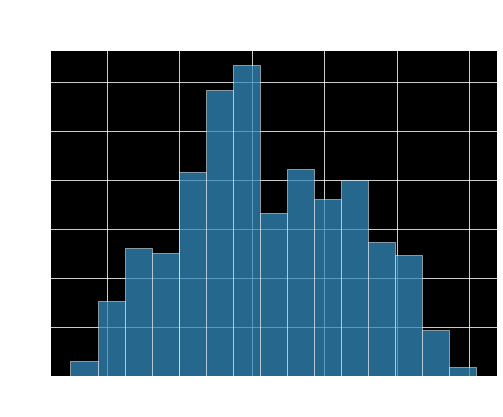

In [ ]:
plt.figure(figsize=(8,6))
plt.style.use('dark_background')
plt.suptitle('Clientes de Meia Idade dominam a base', weight = 'bold', color = 'white').set_fontsize(18)
plt.title('Distribuição dos clientes Maven de acordo com a idade', color = 'white').set_fontsize(10)
sns.histplot(base_1_clean['Idade'], kde=False, bins=15)
plt.xlabel('Idade', weight = 'bold', color = 'white')
plt.ylabel('Quantidade de clientes', weight = 'bold', color = 'white')

**O cliente Maven é casado? Solteiro? Onde Mora? Qual seu grau de instrução?**

Clientes **CASADOS compõem a maior parte dos indivíduos da base**. 

In [ ]:
#Quantidade de clientes por "Estado Civil"
dist_Est_Civil = base_1_clean['Est_Civil'].value_counts()
display ((dist_Est_Civil).sort_values(ascending=True))

Só se vive 1 vez      4
Viuvo                77
Divorciado          231
Solteiro            482
Morando Junto       578
Casado              864
Name: Est_Civil, dtype: int64

... e, com relação à instrução, **a grande maioria concluiu, ao menos, o Ensino Superior**

Text(0, 0.5, 'Quantidade de Clientes')

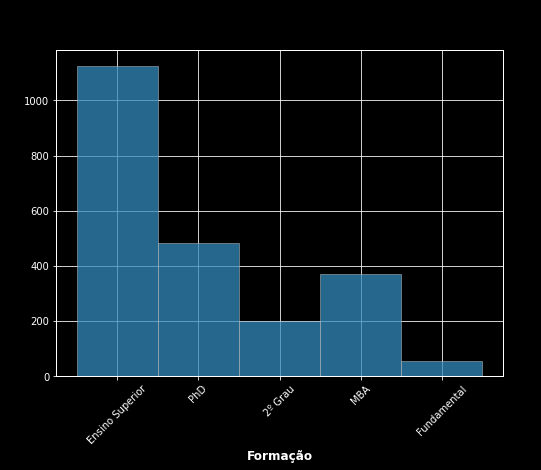

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot( x='Educacao', data = base_1_clean, edgecolor='silver')
plt.suptitle('A maioria dos clientes tem pelo menos o Ensino Superior!', weight='bold', color='black').set_fontsize(16)
plt.title('Distribuição dos clientes de acordo com a Formação', color = 'black',  ).set_fontsize(10)
plt.xlabel('Formação', weight = 'bold')
plt.xticks(rotation=45)
plt.ylabel('Quantidade de Clientes', weight = 'bold', color = 'black')

**Onde ele Mora?**

Quase metade dos clientes (49%) vive em São Paulo.

In [ ]:
# Quantidade de clientes por Região
dist_Local = base_1_clean['Localizacao'].value_counts()
display ((dist_Local).sort_values(ascending=False))

São Paulo            1094
Rio de Janeiro        335
Minas Gerais          268
Santa Catarina        160
Rio Grande do Sul     147
Paraná                120
Brasília              109
Bahia                   3
Name: Localizacao, dtype: int64

In [ ]:
display ((dist_Local).sort_values(ascending=False)/(dist_Local).sort_values(ascending=False).sum()*100)

São Paulo            48.926655
Rio de Janeiro       14.982111
Minas Gerais         11.985689
Santa Catarina        7.155635
Rio Grande do Sul     6.574240
Paraná                5.366726
Brasília              4.874776
Bahia                 0.134168
Name: Localizacao, dtype: float64

**Renda**

Vimos pouco acima que mais de 50% dos clientes tem renda entre 35 e 70 mil e que a mediana, o valor que está no centro da distribuição dos dados, é de 52 mil.

Text(0, 0.5, 'Quantidade de Clientes')

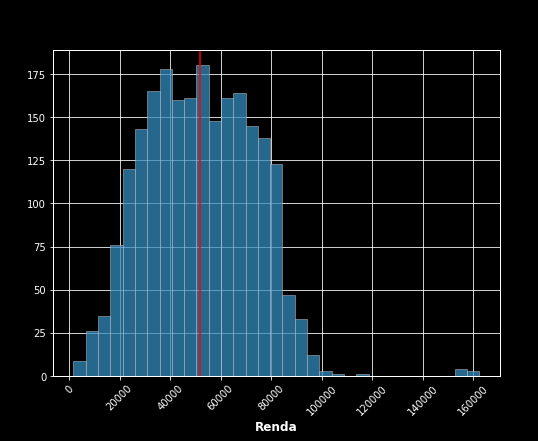

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot( x='Renda', data = base_1_clean, edgecolor='silver')
# adicionando a linha da mediana
med_renda = base_1_clean['Renda'].mean()
plt.axvline(x=med_renda, color='red', label='Mean')

plt.suptitle('A maioria dos clientes tem pelo menos o Ensino Superior!', weight='bold', color='black').set_fontsize(16)
plt.title('Distribuição dos clientes de acordo com a Formação', color = 'black',  ).set_fontsize(10)
plt.xlabel('Renda', weight = 'bold')
plt.xticks(rotation=45)
plt.ylabel('Quantidade de Clientes', weight = 'bold', color = 'black')

## Perfil do Cliente Maven:
Segundo os dados disponibilizados, o cliente Maven é uma pessoa de **meia idade** (45 - 52 anos), **casado**, que **mora em São Paulo** e tem **formação superior** ou mais anos de estudo, desfrutando de uma **renda média em torno de 52 mil** anuais.

Agora que já o conhecemos um pouco melhor, vamos ver como ele gasta seu dinheiro e interage com os produtos e canais da Maven, e como isto varia por região / canal. 

In [ ]:
#Criando a Coluna com o Total Gasto (R$) nos últimos 2 anos
base_1_clean['Total_Gasto'] = base_1_clean[['Vlr_Vinho', 'Vlr_Frutas', 'Vlr_Carne', 'Vlr_Peixe', 'Vlr_Doces', 'Vlr_Ouro']].sum(1) 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'R$ / pedido')

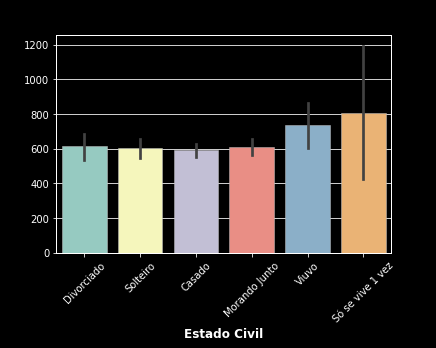

In [ ]:
plt.suptitle('Clientes com estado civil "YOLO" gastam mais!', weight='bold', color='black').set_fontsize(16)
plt.title('Ticket Médio por Estado Civil (R$ / pedido)', color = 'black').set_fontsize(10)
sns.barplot( 'Est_Civil', 'Total_Gasto', data = base_1_clean, edgecolor='silver')
plt.xlabel('Estado Civil', weight = 'bold')
plt.xticks(rotation=45)
plt.ylabel('R$ / pedido', weight = 'bold', color = 'black')

In [ ]:
Gastos_Est_Civil = base_1_clean[base_1_clean['Est_Civil'] == 'Só se vive 1 vez']
display (Gastos_Est_Civil[['ID', 'Total_Gasto']])

,ID,Total_Gasto
103,492,424
104,11133,424
1068,4369,1169
1339,7734,1216


Clientes casados são os que menos gastam, por pedido, e formam a maioria da base de clientes. 

Enquanto isso, os com status YOLO, gastam 30% mais do que a média.. mas são apenas 04 clientes entre os mais de 2.200 da base.

Destes, apenas 02 puxam a média pra cima.. Não vale a pena se atentar neste grupo, neste momento.

Vamos avaliar se há diferenças significativas no consumo por região e por canal

**Explorando Regiões, Canais e Segmentos**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'São Paulo'),
  Text(1, 0, 'Minas Gerais'),
  Text(2, 0, 'Brasília'),
  Text(3, 0, 'Santa Catarina'),
  Text(4, 0, 'Paraná'),
  Text(5, 0, 'Rio Grande do Sul'),
  Text(6, 0, 'Rio de Janeiro'),
  Text(7, 0, 'Bahia')])

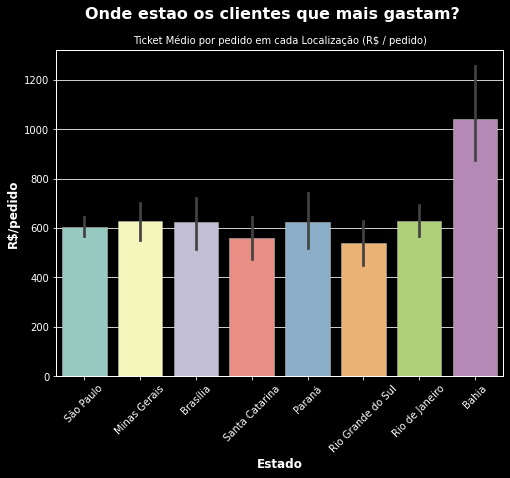

In [ ]:
plt.figure(figsize=(8,6))
plt.style.use('dark_background')
plt.suptitle('Onde estao os clientes que mais gastam?', weight='bold', color='white').set_fontsize(16)
plt.title('Ticket Médio por pedido em cada Localização (R$ / pedido)', color = 'white').set_fontsize(10)
sns.barplot('Localizacao', 'Total_Gasto' , data = base_1_clean, edgecolor='silver')
plt.xlabel('Estado', weight = 'bold')
plt.ylabel('R$/pedido', weight = 'bold')
plt.xticks(rotation=45)

Parece que os clientes localizados na Bahia são os que mais gastam. 
Vamos descobrir mais sobre eles

In [ ]:
bahia = base_1_clean[base_1_clean['Localizacao'] == 'Bahia']
display (bahia)

,ID,Dt_Nascto,Educacao,Est_Civil,Renda,Nro_Criancas,Nro_Adolesc,Dt_Cadastro,Recencia,Vlr_Vinho,...,Conv_2a_camp,Conv_ult_camp,Reclam_ult_2anos,Localizacao,Ano_Nascto,Ano_1o_Pedd,Idade_1o_Pedd,dt_ger_base,Idade,Total_Gasto
149,9323,1949-01-01,MBA,Morando Junto,49912,0,1,2012-09-07,5,520,...,0,1,0,Bahia,1949,2012,63,2021-02-05,72.0,874
293,5080,1993-01-01,Ensino Superior,Solteiro,70515,0,0,2013-10-21,12,420,...,0,1,0,Bahia,1993,2013,20,2021-02-05,28.0,1258
1436,2920,1975-01-01,PhD,Solteiro,52614,0,1,2012-12-01,63,789,...,0,0,0,Bahia,1975,2012,37,2021-02-05,46.0,990


São apenas 03 clientes. Tem ticket médio ralmente alto, boa frequencia e compraram relativamente recente . Mas não ha volume em quantidade estatísticamente válida para maiores análises.. 

Ainda assim, fica a recomendação para explorar e investir mais na região.

Para melhor explorar as informações de N° de pedidos por  Canais e por local (Estados), vamos criar uma nova base de dados com informações sobre o número de pedidos de cada canal de vendas para cada estado da base de dados original. 

In [ ]:
# Criando uma lista com os Estados e Regiões da base
Estados_br = list(base_1_clean.Localizacao.unique())

# Criando uma lista para os Canais de Vendas
Canais_Vendas = list()
Canais = ['Site', 'Loja', 'Catalogo']

# Criando uma lista que contém o nome das colunas da base de dados original com o número correspondente de pedidos para cada canal de vendas. 
cols = ['Nro_Peds_Site', 'Nro_Peds_Loja', 'Nro_Peds_Catlg' ]

# Atribuindo os valores para cada canal e criando uma nova base de dados

# Percorrer cada canal na lista 'Canais' ('Site', 'Loja', 'Catalogo') e, usando 'col_index', encontrar a coluna correspondente na lista 'cols'

for channel in Canais:
    col_index = Canais.index(channel)
    col = cols[col_index]

# criando a nova base de dados somente com a coluna Localização
    base_canais_estados = pd.DataFrame(Estados_br, columns = ['Localizacao'])

# adicionando uma nova coluna 'Canal de Vendas' com as informações geradas até aqui
    base_canais_estados['Canal de Venda'] = channel

# adicionando uma nova coluna 'Nro_Pedidos' atribuindo a ela um valor placeholder "0"
    base_canais_estados['Nro_Pedidos'] = 0

# O loop 'for i in ind' itera sobre cada linha da nova base de dados e obtém o número total de pedidos para aquele canal e estado, 
# somando todos os pedidos da coluna correspondente na base de dados original ('base_1_clean'). 
# O resultado é armazenado na coluna 'Nro_Pedidos' da nova base de dados.
    
    ind = base_canais_estados.index

    for i in ind:
        base_canais_estados.iloc[i, 2] = base_1_clean[base_1_clean['Localizacao'] == base_canais_estados.iloc[i, 0]][col].sum()

# Por fim, todas as bases de dados criadas para cada canal de vendas são combinadas em uma única base
    Canais_Vendas.append(base_canais_estados)
    base_canais_estados = pd.concat(Canais_Vendas, ignore_index = True)

# conferindo
base_canais_estados

,Localizacao,Canal de Venda,Nro_Pedidos
0,São Paulo,Site,4378
1,Minas Gerais,Site,1154
2,Brasília,Site,484
3,Santa Catarina,Site,654
4,Paraná,Site,477
5,Rio Grande do Sul,Site,582
6,Rio de Janeiro,Site,1393
7,Bahia,Site,18
8,São Paulo,Loja,6348
9,Minas Gerais,Loja,1568


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

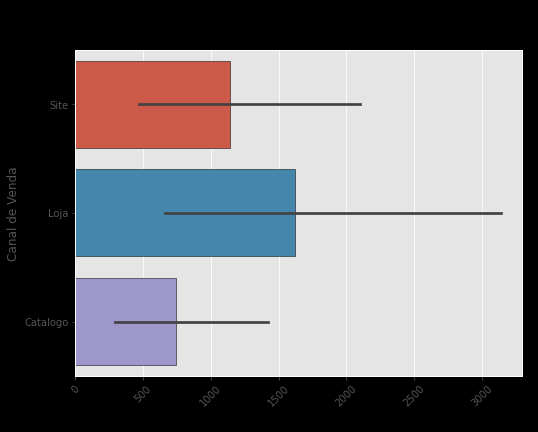

In [ ]:
plt.figure(figsize=(8,6))
plt.style.use('ggplot')
sns.barplot('Nro_Pedidos', 'Canal de Venda', data = base_canais_estados, edgecolor='black', orient='h')
plt.suptitle('As lojas físicas têm a preferência dos clientes Maven', weight='bold', color = 'black').set_fontsize(16)
plt.title('Número de pedidos por Canal de Vendas', color = 'black').set_fontsize(10)
plt.xlabel('Número de Pedidos', weight = 'bold', color = 'black')
plt.xticks(rotation=45)




Agora vamos fazer a mesma categorização para os Produtos. De forma a descobrir os produtos preferidos pela base de clientes de cada estado

In [ ]:
#create a list of all countries in original dataframe
# Criando uma lista dos produtos
Prods_br = list()

# Criando a lista das categorias de produtos
Produtos = ['Vinho', 'Frutas', 'Carne', 'Peixe', 'Doces', 'Ouro']

# Criando a lista correspondente do valor vendido em cada categoria de produtos
cols = ['Vlr_Vinho','Vlr_Frutas', 'Vlr_Carne', 'Vlr_Peixe', 'Vlr_Doces', 'Vlr_Ouro']


# Loop para criar a nova base de dados para cada produto.
for Prods in Produtos:

    col_index = Produtos.index(Prods)
    col = cols[col_index]
    base_produtos_estados = pd.DataFrame(Estados_br, columns = ['Localizacao'])
    base_produtos_estados['Produto'] = Prods
    base_produtos_estados['Valor Gasto'] = 0
    ind = base_produtos_estados.index
    for i in ind:
        base_produtos_estados.iloc[i, 2] = base_1_clean[base_1_clean['Localizacao'] == base_produtos_estados.iloc[i, 0]][col].sum()
    Prods_br.append(base_produtos_estados)
    
# Por fim, todas as bases de dados criadas para cada produto são combinadas em uma única base
base_produtos_estados = pd.concat(Prods_br, ignore_index = True)

#check
base_produtos_estados.head(15                           )

,Localizacao,Produto,Valor Gasto
0,São Paulo,Vinho,337236
1,Minas Gerais,Vinho,84649
2,Brasília,Vinho,32406
3,Santa Catarina,Vinho,44372
4,Paraná,Vinho,37483
5,Rio Grande do Sul,Vinho,36253
6,Rio de Janeiro,Vinho,105901
7,Bahia,Vinho,1729
8,São Paulo,Frutas,28302
9,Minas Gerais,Frutas,7746


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 100000.0)

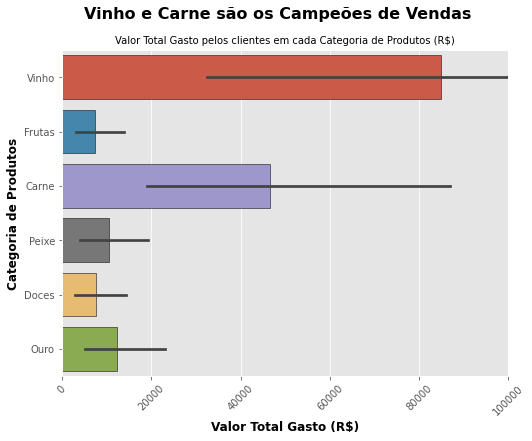

In [ ]:
plt.figure(figsize=(8,6))
plt.style.use('ggplot')
sns.barplot('Valor Gasto', 'Produto', data = base_produtos_estados, edgecolor='black', orient='h')
plt.suptitle('Vinho e Carne são os Campeões de Vendas', weight='bold', color = 'black').set_fontsize(16)
plt.title('Valor Total Gasto pelos clientes em cada Categoria de Produtos (R$)', color = 'black').set_fontsize(10)
plt.xlabel('Valor Total Gasto (R$)', weight = 'bold', color = 'black')
plt.xticks(rotation=45)
plt.ylabel('Categoria de Produtos', weight = 'bold', color = 'black')
plt.xlim(0, 100000)

**Perfil de Consumo**

Até aqui, já é possível desenhar o perfil de consumo do cliente Maven. Vemos que, apesar dos avanços e opções de compra remota (como por catálogo ou pelo site) **os clientes Maven, ainda preferem comprar pelas lojas físicas**, o que está em linha com a composição etária da base. 

**Vinhos e Carnes se destacam entre os produtos mais frequentes** e com maior geração de receita no período analisado. 

Até aqui, já respondemos às seguintes questões: 

   - Qual o perfil médio de um cliente da Maven?
   - Quais produtos performam melhor?
   - Quais canais são os favoritos dos clientes?
   - Onde estão localizados os clientes que gastam mais?

Agora, para respoder ás perguntas remanescentes, vamos precisar ir mais a fundo e usar recursos mais sofisticadoss de análise. 

   -  Há fatores que influenciam as compras online de forma significativa?
   -  Qual o grupo de clientes mais importantes? quem são eles?
   -  Que grupo de clientes merece atenção especial? Por que? 
   -  Quais campanhas de Marketing tiveram melhor desempenho?
   -  Como posso vender mais para esta base de clientes?

# **Estabelecendo correlações estatísticas**

Vamos escolher alguns dos atributos numéricos da nossa base e usar a ferramenta de correlação para descobrir como elas estão relacionadas entre si.

Vamos criar uma matriz de correlação, que vai mostrar como cada par de colunas está correlacionado entre si, podendo variar entre -1 (correlação negativa perfeita) e 1 (correlação positiva perfeita), sendo 0 a ausência de correlação.

Relações fortes entre variáveis, **podem indicar** dependência ou causalidade entre elas.

In [ ]:
display(base_1_clean.columns)

Index(['ID', 'Dt_Nascto', 'Educacao', 'Est_Civil', 'Renda', 'Nro_Criancas',
       'Nro_Adolesc', 'Dt_Cadastro', 'Recencia', 'Vlr_Vinho', 'Vlr_Frutas',
       'Vlr_Carne', 'Vlr_Peixe', 'Vlr_Doces', 'Vlr_Ouro', 'Nro_Peds_Dsc',
       'Nro_Peds_Site', 'Nro_Peds_Catlg', 'Nro_Peds_Loja',
       'Visitas_Site_Mes-1', 'Conv_3a_camp', 'Conv_4a_camp', 'Conv_5a_camp',
       'Conv_1a_camp', 'Conv_2a_camp', 'Conv_ult_camp', 'Reclam_ult_2anos',
       'Localizacao', 'Ano_Nascto', 'Ano_1o_Pedd', 'Idade_1o_Pedd',
       'dt_ger_base', 'Idade'],
      dtype='object')

In [ ]:
# criando uma variável com as informações que pretendemos trabalhar 
correl = ['Dt_Nascto','Renda','Nro_Criancas','Nro_Adolesc','Dt_Cadastro','Recencia',
          'Vlr_Vinho','Vlr_Frutas','Vlr_Carne','Vlr_Peixe','Vlr_Doces','Vlr_Ouro','Nro_Peds_Dsc',
          'Nro_Peds_Site','Nro_Peds_Catlg','Nro_Peds_Loja','Visitas_Site_Mes-1',
          'Total_Gasto']

# criando a matriz de correlação entre as informações da variável criada
matriz_correlacao = base_1_clean[correl].corr()
display (matriz_correlacao)

,Renda,Nro_Criancas,Nro_Adolesc,Recencia,Vlr_Vinho,Vlr_Frutas,Vlr_Carne,Vlr_Peixe,Vlr_Doces,Vlr_Ouro,Nro_Peds_Dsc,Nro_Peds_Site,Nro_Peds_Catlg,Nro_Peds_Loja,Visitas_Site_Mes-1,Total_Gasto
Renda,1.000000,-0.510263,0.034376,0.007963,0.685944,0.504859,0.684170,0.518381,0.518161,0.383593,-0.107140,0.450579,0.693660,0.627943,-0.646426,0.789292
Nro_Criancas,-0.510263,1.000000,-0.035339,0.007964,-0.496166,-0.372442,-0.436901,-0.387404,-0.370486,-0.349462,0.221489,-0.361982,-0.502331,-0.500192,0.447626,-0.556719
Nro_Adolesc,0.034376,-0.035339,1.000000,0.016746,0.005047,-0.176117,-0.261171,-0.204177,-0.162527,-0.020447,0.388293,0.155649,-0.110551,0.050177,0.134636,-0.138197
Recencia,0.007963,0.007964,0.016746,1.000000,0.016321,-0.003717,0.023446,0.001314,0.022796,0.017168,-0.000638,-0.010776,0.025226,0.000771,-0.021850,0.020842
Vlr_Vinho,0.685944,-0.496166,0.005047,0.016321,1.000000,0.388472,0.561886,0.398956,0.385845,0.386234,0.011173,0.542136,0.634716,0.642313,-0.320287,0.891696
Vlr_Frutas,0.504859,-0.372442,-0.176117,-0.003717,0.388472,1.000000,0.542030,0.594415,0.567030,0.389999,-0.131792,0.296986,0.487274,0.463136,-0.417405,0.613122
Vlr_Carne,0.684170,-0.436901,-0.261171,0.023446,0.561886,0.542030,1.000000,0.567813,0.523329,0.348727,-0.122242,0.293502,0.723473,0.479983,-0.539183,0.842624
Vlr_Peixe,0.518381,-0.387404,-0.204177,0.001314,0.398956,0.594415,0.567813,1.000000,0.579490,0.422018,-0.139263,0.293424,0.533969,0.459997,-0.445729,0.642335
Vlr_Doces,0.518161,-0.370486,-0.162527,0.022796,0.385845,0.567030,0.523329,0.579490,1.000000,0.369084,-0.120064,0.348236,0.490416,0.448673,-0.423215,0.602610
Vlr_Ouro,0.383593,-0.349462,-0.020447,0.017168,0.386234,0.389999,0.348727,0.422018,0.369084,1.000000,0.050192,0.422673,0.436909,0.383124,-0.249041,0.522653


Agora vamos plotar estas informações em um mapa de calor, para identificar mais facilmente as correlações. 

Para fins de análise, estou considerando uma **correlação alta**, qualquer uma **acima de 0,7**. 

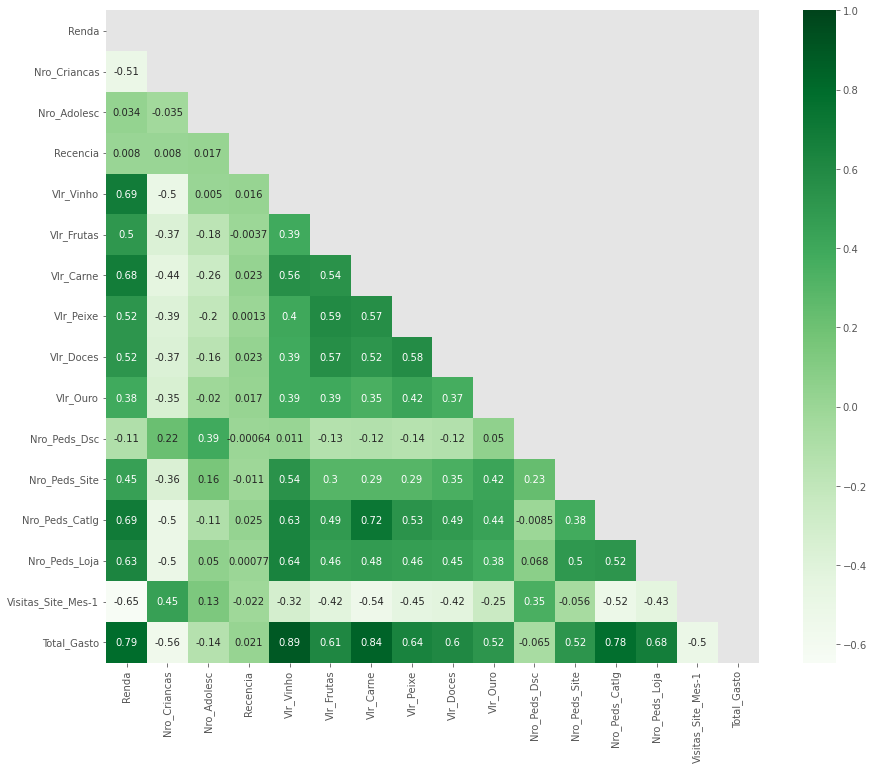

In [ ]:
fig = plt.figure(figsize=(16, 12))

# como a matriz é simétrica, vou pedir pra não exibir a parte superior direita. Menos informações na tela pra avaliar.
mask = np.triu(np.ones_like(matriz_correlacao, dtype=bool))

# Criando um mapa de calor que usa a paleta de cor na qual verde escuro, indica forte correlação. branco, indica correlação negativa
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(matriz_correlacao, vmax=1, mask=mask, square=True, annot=True, cmap=cmap)

plt.show()


Algumas avaliações **mais óbvias**, que confirmam que o gráfico está correto:

   - O **Nº de pedidos** e o **Total gasto**, apresentam forte correlação entre si e estão mutuamente correlacionados com a **frequencia de compra**. Clientes mais frequentes, ao final de um período, deixam mais dinheiro no caixa da empresa.

   - As relações entre idade, ano de nascimento e idade do 1º pedido, tambem fazem sentido.


Outras observações **menos óbvias** (**e muito mais interessantes**):

   - Apesar de toda a facilidade proporcionada por canais como e-commerce e catálogo, **os clientes mais fieis fazem a maioria de seus pedidos nas lojas físicas**.

   - Há uma forte correlação entre os **clientes que compram carne** e os **clientes do catálogo**.. Promoções voltadas a eles através do catálogo podem ser uma boa opção.

   - **Clientes que compram carne e vinho são os que mais gastam** (alta correlação com Total Gasto)

   - Não foi identificado **nenhum fator de correlação forte com o Nro_Peds_Site** que possa indicar algum influenciador das compras online.

# **Análise RFM | Segmentação de clientes**


A segmentação de clientes é o processo pelo qual dividimos os clientes em grupos com base em características comuns, como dados demográficos (idade, sexo, renda etc.), geografia, psicologia e comportamento. O principal objetivo é identificar características em comuns e criar grupos de clientes para que mensagens ou promoções específicas e customizadas sejam direcionadas a estes grupos.



**O que é Análise RFM?**
A análise RFM é um método de segmentação de clientes que agrupa clientes com base em seu comportamento de compra anterior. RFM representa três características principais do cliente, ou seja, Recência da compra, Frequência da compra e Valor monetário da compra.


 - Recência **(R)** – Tempo ou dias desde a última compra ou último pedido
 - Frequência **(F) **– Número total de compras ou contagem de pedidos
 - Valor Monetário **(M)** - Valor total gasto ou ticket médio dos pedidos


**Os atributos de frequência e monetários afetam o LTV (Life Time Value) **de um cliente, e a **recência afeta a retenção e o engajamento**. O RFM é popularmente usado para analisar tipos de clientes, especialmente no setor de varejo. 

A análise de RFM pode ajudar a responder a questões críticas de negócios, como **quem são os melhores clientes**, quem tem potencial para se tornar um deles, ou quem pode vir a deixar de ser cliente **(CHURN)** e que tipo de cliente responde melhor a uma campanha de marketing específica.

In [ ]:
# Criando a Coluna Frequencia: Nº total de pedidos nos últimos 2 anos
base_1_clean['Frequencia'] = base_1_clean[['Nro_Peds_Site', 'Nro_Peds_Catlg','Nro_Peds_Loja']].sum(1)

In [ ]:
# Definindo os Atributos RFM
# Recencia (R) = baseado no nº de dias desde a última compra (poucos dias = + Recente; muitos dias = + antigo)
base_1_clean['at_R'] = pd.qcut(base_1_clean['Recencia'], 4, labels=['3_Muito Recente', '2_Recente',  '1_Antigo', '0_Muito Antigo'])

# Frequencia (R) =  baseado no nº de pedidos feitos nos últimos 2 anos (período da base) (poucos pedidos = Raramente Compra; muitos pedidos = cliente fiel)
base_1_clean['at_F'] = pd.qcut(base_1_clean['Frequencia'], 4, labels=['0_Raramente Compra', '1_Pouco Frequente', '2_Fiel', '3_Muito Fiel'] ) 

# Valor Monetario (M) =  baseado no valor total gasto nos últimos 2 anos (período da base)
base_1_clean['at_M'] = pd.qcut(base_1_clean['Total_Gasto'], 4, labels=['0_Valor Muito Baixo',  '1_Valor Baixo','2_Valor Alto','3_Valor Muito Alto'])

#concatenar para criar os Atributos RFM
base_1_clean['Atributos_RFM'] = base_1_clean['at_R'].astype(str) +" & " + base_1_clean['at_F'].astype(str) +" & " + base_1_clean['at_M'].astype(str)

In [ ]:
# atribuindo um valor a cada atributo do Score RFM (será usado nos gráficos)
base_1_clean['sc_R'] = pd.qcut(base_1_clean['Recencia'], 4, labels=['3','2', '1', '0']).astype(int)
base_1_clean['sc_F'] = pd.qcut(base_1_clean['Frequencia'], 4, labels=['0', '1', '2',' 3']).astype(int)
base_1_clean['sc_M'] = pd.qcut(base_1_clean['Total_Gasto'], 4, labels=['0', '1', '2',' 3']).astype(int)

#concatenar para criar o RFM Score
base_1_clean['Score_RFM'] = round((4*(base_1_clean['sc_R'].astype(int)) + 2*(base_1_clean['sc_F'].astype(int)) + base_1_clean['sc_M'].astype(int))/4)

In [ ]:
#Quantidade de clientes em cada segmento RFM
qtd_score = base_1_clean['Score_RFM'].value_counts()
display ((qtd_score).sort_values(ascending=True))

0.0    196
5.0    198
1.0    258
4.0    445
3.0    487
2.0    653
Name: Score_RFM, dtype: int64

Perfeito! 

Criamos **06 segmentos** distintos, e distribuimos todos os clientes da base entre estes grupos considerando os fatores como Recencia (dias desde a última compra, Frequencia  (quantidade de pedidos nos últimos 2 anos) e Valor Gasto (nos últitmos 2 anos).

Os segmentos de clientes ficaram da seguinte forma:

* **5.0 = *Clientes Premium* =** Comprou Muito Recentemente, Cliente Fiel e compra valores altos.  (198 clientes)

* **4.0 = *Premium Potencial* =** Comprou Recentemente, Mas é pouco frequente e com valores baixos.  (445 clientes)

* **3.0 = *Clientes Ocasionais* =** Comprou Recentemente, Muito frequente ou frequente, mas com valores baixos.  (487 clientes)

* **2.0 = *Clientes Fieis* =** Comprou Recentemente, fiel ou muito Fiel, valores Altos ou Baixos.   (653 clientes)

* **1.0 = *Risco de Abandono* =** Comprou Recentemente, Mas é pouco frequente e com valores baixos.  (258 clientes)

* **0.0 = *Inativos*  =** Muito Antigo & Raramente Compra  & Valor Muito Baixo  (196 clientes)


In [ ]:
# Criando uma coluna para os nomes dos Segmentos 
base_1_clean['Segmento'] = base_1_clean['Score_RFM']


# dando nome aos segmentos para cada cliente a partir do Score RFM que já lhe fora atribuido previamente
base_1_clean['Segmento'] = base_1_clean['Segmento'].replace([5.0],['Premium'])
base_1_clean['Segmento'] = base_1_clean['Segmento'].replace([4.0],['Premium Potencial'])
base_1_clean['Segmento'] = base_1_clean['Segmento'].replace([3.0],['Ocasionais'])
base_1_clean['Segmento'] = base_1_clean['Segmento'].replace([2.0],['Fieis'])
base_1_clean['Segmento'] = base_1_clean['Segmento'].replace([1.0],['Risco Abandono'])
base_1_clean['Segmento'] = base_1_clean['Segmento'].replace([0.0],['Inativo'])

In [ ]:
# conferindo
qtd_score = base_1_clean['Score_RFM'].value_counts()
display ((qtd_score).sort_values(ascending=True))

0.0    196
5.0    198
1.0    258
4.0    445
3.0    487
2.0    653
Name: Score_RFM, dtype: int64

In [ ]:
qtd_nome = base_1_clean['Segmento'].value_counts()
display ((qtd_nome).sort_values(ascending=True))

Inativo              196
Premium              198
Risco Abandono       258
Premium Potencial    445
Ocasionais           487
Fieis                653
Name: Segmento, dtype: int64

In [ ]:

display(base_1_clean[['ID','Recencia','Frequencia','Total_Gasto', 'sc_R', 'at_R','sc_F','at_F', 'sc_M','at_M', 'Score_RFM','Segmento','Atributos_RFM']])

,ID,Recencia,Frequencia,Total_Gasto,sc_R,at_R,sc_F,at_F,sc_M,at_M,Score_RFM,Segmento,Atributos_RFM
0,1826,0,14,1190,3,3_Muito Recente,2,2_Fiel,3,3_Valor Muito Alto,5.0,Premium,3_Muito Recente & 2_Fiel & 3_Valor Muito Alto
1,1,0,17,577,3,3_Muito Recente,2,2_Fiel,2,2_Valor Alto,4.0,Premium Potencial,3_Muito Recente & 2_Fiel & 2_Valor Alto
2,10476,0,10,251,3,3_Muito Recente,1,1_Pouco Frequente,1,1_Valor Baixo,4.0,Premium Potencial,3_Muito Recente & 1_Pouco Frequente & 1_Valor Baixo
3,1386,0,3,11,3,3_Muito Recente,0,0_Raramente Compra,0,0_Valor Muito Baixo,3.0,Ocasionais,3_Muito Recente & 0_Raramente Compra & 0_Valor Muito Baixo
4,5371,0,6,91,3,3_Muito Recente,0,0_Raramente Compra,1,1_Valor Baixo,3.0,Ocasionais,3_Muito Recente & 0_Raramente Compra & 1_Valor Baixo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,99,18,689,0,0_Muito Antigo,2,2_Fiel,2,2_Valor Alto,2.0,Fieis,0_Muito Antigo & 2_Fiel & 2_Valor Alto
2236,5263,99,4,55,0,0_Muito Antigo,0,0_Raramente Compra,0,0_Valor Muito Baixo,0.0,Inativo,0_Muito Antigo & 0_Raramente Compra & 0_Valor Muito Baixo
2237,22,99,12,309,0,0_Muito Antigo,1,1_Pouco Frequente,1,1_Valor Baixo,1.0,Risco Abandono,0_Muito Antigo & 1_Pouco Frequente & 1_Valor Baixo
2238,528,99,19,1383,0,0_Muito Antigo,3,3_Muito Fiel,3,3_Valor Muito Alto,2.0,Fieis,0_Muito Antigo & 3_Muito Fiel & 3_Valor Muito Alto


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

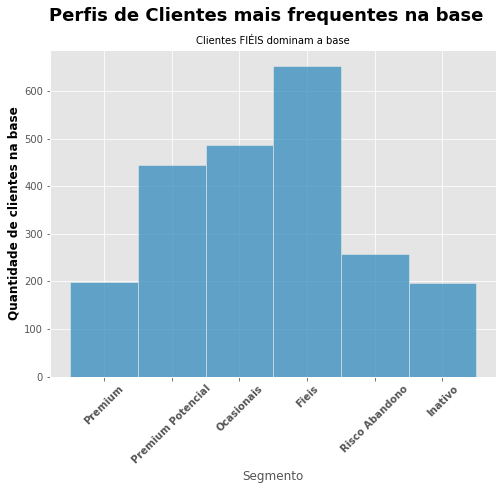

In [ ]:
plt.figure(figsize=(8,6))
plt.style.use('ggplot')
plt.suptitle('Perfis de Clientes mais frequentes na base', weight = 'bold', color = 'black').set_fontsize(18)
plt.title('Clientes FIÉIS dominam a base', color = 'black').set_fontsize(10)
sns.histplot(base_1_clean['Segmento'], kde=False)
plt.ylabel('Quantidade de clientes na base', weight = 'bold', color = 'black')
plt.xticks(rotation=45, weight = 'bold')


 - - -

Agora, já é possível responder aos últimos questionamentos:

**Há fatores que influenciam as compras online de forma significativa?**

- Não! Não foi encontrado nenhum fator relevante que influencie nas vendas online 

.

**Quais campanhas de Marketing tiveram melhor desempenho?**
-  A aúltima campanha foi a que teve uma conversão de .. e por isso é a melhor .. a fçlaj fçlajfa 


**Como posso vender mais para esta base de clientes?**

Algumas sugestões e considerações baseadas no que os dados nos mostraram
 - promoções de carne e vinho no catálogo 
 - ações de resgat de clientes com risco de abandono
 - ações de incentivo a um ticket médio mais alto por parte dos clientes Premium Potencial.


.

**Qual o grupo de clientes mais importantes? quem são eles?**
 - o grupo dblabla bla 


 .
 
**Que grupo de clientes merece atenção especial? Por que?**
   -  Quais campanhas de Marketing tiveram melhor desempenho?
   -  Como posso vender mais para esta base de clientes?


# **Conclusão**

Os dados mostram claramente que  blkça dlçkafj alçfj açl fjaçfj a

In [ ]:
base_1_clean.to_excel('Maven_Clientes_db1_clean.xlsx', encoding='utf-8', sheet_name='maven_db1', index = False)
base_produtos_estados.to_excel('Maven_Clientes_db1_prods_estados.xlsx', encoding='utf-8', sheet_name='Prods', index = False)
base_canais_estados.to_excel('Maven_Clientes_db1_canais_estados.xlsx', encoding='utf-8', sheet_name='Canal', index = False)

In [ ]:
#Exportando os arquivos (originalmente trabalhados no Google Colab)
files.download('Maven_Clientes_db1_clean.xlsx')
files.download('Maven_Clientes_db1_prods_estados.xlsx')
files.download('Maven_Clientes_db1_canais_estados.xlsx')

# Canais x Estados | Maven MKT clientes
# Produtos x Estados | Maven MKT clientes

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

No intuito de poder plotar os dados em gráficos e mapas posteriormente (quando estiver trabalhando em um dashboard no Power BI ou Tableau, vou buscar as informações da Latitude e Longitude de cada estado

In [ ]:
print (Estados_br)

['São Paulo', 'Minas Gerais', 'Brasília', 'Santa Catarina', 'Paraná', 'Rio Grande do Sul', 'Rio de Janeiro', 'Bahia']


In [ ]:


from geopy.extra.rate_limiter import RateLimiter
geolocator = Nominatim(user_agent="GeoMM7.app")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

geo_SP = geolocator.geocode('São Paulo, Brazil')
geo_SC = geolocator.geocode('Santa Catarina, Brazil')
geo_MG = geolocator.geocode('Minas Gerais, Brazil')
geo_RS = geolocator.geocode('Rio Grande do Sul, Brazil')
geo_BA = geolocator.geocode('Bahia, Brazil')
geo_RJ = geolocator.geocode('Rio de Janeiro, Brazil')
geo_PR = geolocator.geocode('Parana, Brazil')
geo_BS = geolocator.geocode('Brasília, Brazil')

In [ ]:
# Criando um novo dicionario com as inforações de Latitude e Longitude 
Lat_Estados_br = {'São Paulo': geo_SP.latitude,
                  'Santa Catarina' : geo_SC.latitude,
                  'Rio Grande do Sul': geo_RS.latitude,
                  'Paraná': geo_PR.longitude,
                  'Brasília': geo_BS.latitude,
                  'Minas Gerais': geo_MG.latitude,
                  'Rio de Janeiro':geo_RJ.latitude,
                  'Bahia': geo_BA.latitude}


Long_Estados_br = {'São Paulo': geo_SP.longitude,
                  'Santa Catarina' : geo_SC.longitude,
                  'Rio Grande do Sul': geo_RS.longitude,
                  'Paraná': geo_PR.longitude,
                  'Brasília': geo_BS.longitude,
                  'Minas Gerais': geo_MG.longitude,
                  'Rio de Janeiro':geo_RJ.longitude,
                  'Bahia': geo_BA.longitude}


In [ ]:
print (Lat_Estados_br)

{'São Paulo': -23.5506507, 'Santa Catarina': -27.0628367, 'Rio Grande do Sul': -29.8425284, 'Paraná': -51.8148872, 'Brasília': -10.3333333, 'Minas Gerais': -18.5264844, 'Rio de Janeiro': -22.9110137, 'Bahia': -12.285251}


In [ ]:
base_produtos_estados['Latitude'] = base_produtos_estados['Localizacao'].map(Lat_Estados_br)
base_produtos_estados['Longitude'] = base_produtos_estados['Localizacao'].map(Long_Estados_br)
base_produtos_estados.head(10)

,Localizacao,Produto,Valor Gasto,Latitude,Longitude
0,São Paulo,Vinho,337236,-23.550651,-46.633382
1,Minas Gerais,Vinho,84649,-18.526484,-44.158865
2,Brasília,Vinho,32406,-10.333333,-53.200000
3,Santa Catarina,Vinho,44372,-27.062837,-51.114965
4,Paraná,Vinho,37483,-51.814887,-51.814887
5,Rio Grande do Sul,Vinho,36253,-29.842528,-53.768058
6,Rio de Janeiro,Vinho,105910,-22.911014,-43.209373
7,Bahia,Vinho,1729,-12.285251,-41.929478
8,São Paulo,Frutas,28302,-23.550651,-46.633382
9,Minas Gerais,Frutas,7746,-18.526484,-44.158865


In [ ]:
base_canais_estados['Latitude'] = base_canais_estados['Localizacao'].map(Lat_Estados_br)
base_canais_estados['Longitude'] = base_canais_estados['Localizacao'].map(Long_Estados_br)
base_canais_estados.head(10)

,Localizacao,Canal de Venda,Nro_Pedidos,Latitude,Longitude
0,São Paulo,Site,4378,-23.550651,-46.633382
1,Minas Gerais,Site,1154,-18.526484,-44.158865
2,Brasília,Site,484,-10.333333,-53.200000
3,Santa Catarina,Site,654,-27.062837,-51.114965
4,Paraná,Site,477,-51.814887,-51.814887
5,Rio Grande do Sul,Site,582,-29.842528,-53.768058
6,Rio de Janeiro,Site,1396,-22.911014,-43.209373
7,Bahia,Site,18,-12.285251,-41.929478
8,São Paulo,Loja,6348,-23.550651,-46.633382
9,Minas Gerais,Loja,1568,-18.526484,-44.158865


In [ ]:
# 2 gráficos juntos. pra comparar.. não funcionou 
#fig, ax=plt.subplots(1, 2, figsize=(15, 3))

#plt.figure(figsize=(8,6))
 # Graf 01
#plt.suptitle('C#lientes com estado civil "YOLO" gastam mais!', weight='bold', color='black').set_fontsize(16)
#plt.title('Ticket Médio por Estado Civil (R$ / pedido)', color = 'black').set_fontsize(10)
#sns.barplot( 'Est_Civil', 'Total_Gasto', data = base_1_clean, edgecolor='silver')
#plt.xlabel('Estado Civil', weight = 'bold')
#plt.xticks(rotation=45)
#plt.ylabel('R$ / pedido', weight = 'bold', color = 'black')

# o grafico é exatamente o mesmo . pq nao funcionou???
# Graf 02
#plt.suptitle('C#lientes com estado civil "YOLO" gastam mais!', weight='bold', color='black').set_fontsize(16)
#plt.title('Ticket Médio por Estado Civil (R$ / pedido)', color = 'black').set_fontsize(10)
#sns.barplot( 'Est_Civil', 'Total_Gasto', data = base_1_clean, edgecolor='silver')
#plt.xlabel('Estado Civil', weight = 'bold')
#plt.xticks(rotation=45)
#plt.ylabel('R$ / pedido', weight = 'bold', color = 'black')